# Problème 3 : Regroupement de données Textuelles
## 1-Definition et Explication
#### Il s’agit d’un jeu de données pour la classification binaire des sentiment de personnes. Ils nous ont fourni un ensemble de 25 000 Critiques de films polaires pour la formation et 25 000 pour test. Il existe des données supplémentaires non étiquetées à utiliser comme puits. Texte brut et sac de mots déjà traité Les formats sont fournis dans le data.
#### Ici nous sommes dans un cas de problème d'apprentissage automatique non supervisé. Tout d'abord un apprentissage automatique non supervisé est un apprentissage dans lequel les valeurs (données) d'entrées sont données sans étiquettes ou cibles.
#### Plus précisement nous sommes dans un cas de clustering ou on doit faire des regroupements selon la satisfaction des personnes qui ont régardé les films. Le clustering est une technique d’apprentissage automatique permettant de regrouper des chaînes de données par distance ou par similarité




## 2- Formulation Mathématique
#### Nous allons optés pour la méthode Elbow
La méthode Elbow est une méthode empirique permettant de trouver le nombre optimal de clusters pour un ensemble de données. Dans cette méthode, nous choisissons une plage de valeurs candidates de k, puis appliquons le clustering K-Means en utilisant chacune des valeurs de k.

La statistique Gap est une autre technique populaire pour déterminer le nombre optimal de clusters et peut être appliquée à n'importe quelle méthode de clustering.

L'idée de la statistique Gap est de comparer l'inertie du cluster sur les données à ses attentes sous un ensemble de données de référence null approprié. Les ensembles de données de référence nuls peuvent être échantillonnés à partir d'une distribution normale ou d'une distribution uniforme. Le choix optimal de K est une valeur qui maximise les statistiques d'écart entre l'inertie intra-cluster de l'ensemble de données et l'ensemble de données référencé null.
Gap(n ) (k) ) = E_n^* {log⁡(w_k ) }-log⁡(w_k )
source : https://statweb.stanford.edu/~gwalther/gap
Les statistiques d'écart sont la différence entre le E ₙ, qui est l'espérance des données référencées nulles calculées comme un journal du total dans la variation intra-cluster et le total dans la variation intra-cluster pour l'ensemble de données
#### 
K-means est un algorithme non supervisé de clustering non hiérarchique. Il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront  dans un même cluster. Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance). Une même observation, ne pourra donc, appartenir à deux clusters différents.
#### 
K-means est un algorithme itératif qui minimise la somme des distances entre chaque individu et le centroïd. Le choix initial des centroïdes conditionne le résultat final.
Admettant un nuage d’un ensemble de points, K-Means change les points de chaque cluster jusqu’à ce que la somme ne puisse plus diminuer. Le résultat est un ensemble de clusters compacts et clairement séparés, sous réserve de choisir la bonne valeur K  du nombre de clusters .

## importation des packages

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from matplotlib import colors
from scipy import sparse as sp
from sklearn.datasets import load_files


## 3-  preprocessing

### Chargement du jeu de données et Exploration

In [9]:
data_neg = load_files('C:/Users/user/Desktop/Doc Professionnel/ODC/PROJET/aclImdb/test')
#data_neg1 = load_files('C:/Users/user/Desktop/Doc Pr bofessionnel/ODC/PROJET/aclImdb/train')

In [31]:
print(len(data_neg.data))
#print(len(data_neg1.data))

25000


In [32]:
df = np.array(data_neg.data)
df1 = np.array(data_neg1.data)

In [33]:
print(df.shape)
#print(df1.shape)

(25000,)


In [35]:
ma_data = np.array(data_neg.target)
#ma_data1 = np.array(data_neg1.target)
len(ma_data)
#len(ma_data1)

25000

In [36]:
data = pd.DataFrame(df)
data['target'] = ma_data
data

,0,target
0,"b""Don't hate Heather Graham because she's beau...",1
1,b'I don\'t know how this movie has received so...,0
2,"b""I caught this movie on the Horror Channel an...",1
3,b'NBC had a chance to make a powerful religiou...,0
4,"b""Looking for something shocking? Okay fine......",0
...,...,...
24995,"b""After watching Tipping the Velvet by Sarah w...",1
24996,"b""The three main characters are all hopeless, ...",1
24997,b'I haven\'t reviewed on IMDb before but this ...,0
24998,b'Forget what I said about Emeril. Rachael Ray...,0


In [37]:
# decortication de la chaine de caractère en mot et association d'un vecteur à chaque mot
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df)
X_counts.shape

(25000, 73822)

In [38]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
type(X_tfidf)

scipy.sparse._csr.csr_matrix

## Choix et Entrainement du Modèle

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\user\anaconda3\lib\site-pack

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\user\anaconda3\lib\site-pack

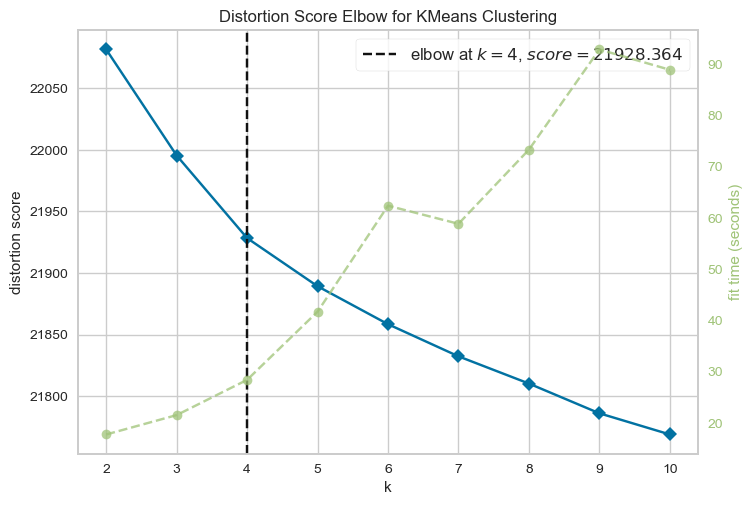

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# méthode du Elbow pour trouver le nombre de clusters à réaliser.
Elbow_M = KElbowVisualizer(KMeans(random_state = 0), k=10, random_state=0)
Elbow_M.fit(X_tfidf)
Elbow_M.show()

In [26]:
# Initier le modèle de clustering kmeans
kmeans = KMeans(n_clusters = 5, n_init = 25, random_state = 2)
kmeans 

KMeans(n_clusters=5, n_init=25, random_state=2)

In [27]:
# je vais ajuster le modèle et prédire les clusters
model = kmeans.fit(X_tfidf)
yhat = model.predict(X_tfidf)
print(yhat[:10])


[2 1 3 2 1 2 2 3 4 0]


## Dans ce problème, il existe de nombreux facteurs sur la base desquels la classification finale sera faite. Ces facteurs sont essentiellement des attributs ou des caractéristiques. Plus le nombre de fonctionnalités est élevé, plus il est difficile de travailler avec.  C'est pourquoi je vais effectuer une réduction de dimensionnalité sur les entités sélectionnées avant de les soumettre à un classificateur.
*La réduction de dimensionnalité est le processus de réduction du nombre de variables aléatoires considérées, en obtenant un ensemble de variables principales.* 

**Principal component analysis (PCA Analyse des composants principaux)** 
est une technique pour réduire la dimensionnalité de tels ensembles de données, augmentant l'interprétabilité mais en même temps minimisant la perte d'informations.

**Etape de cette Section:**
* Reduction de la dimentionalité avec TruncatedSVD (pca)
* Tracer le Dataframe

**Reduction de la dimentionalité avec PCA**

Pour ce projet, On va réduire les dimensions à 3.

In [28]:
pca = TruncatedSVD(3)
pca.fit(X_tfidf)
PCA_ds = pd.DataFrame(pca.transform(X_tfidf), columns = (["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,25000.0,0.332336,0.089619,0.011322,0.270335,0.329290,0.391194,0.671597
col2,25000.0,-0.003193,0.085857,-0.160161,-0.068675,-0.025352,0.045153,0.689083
col3,25000.0,0.001232,0.080607,-0.260576,-0.056185,-0.004725,0.052877,0.368808


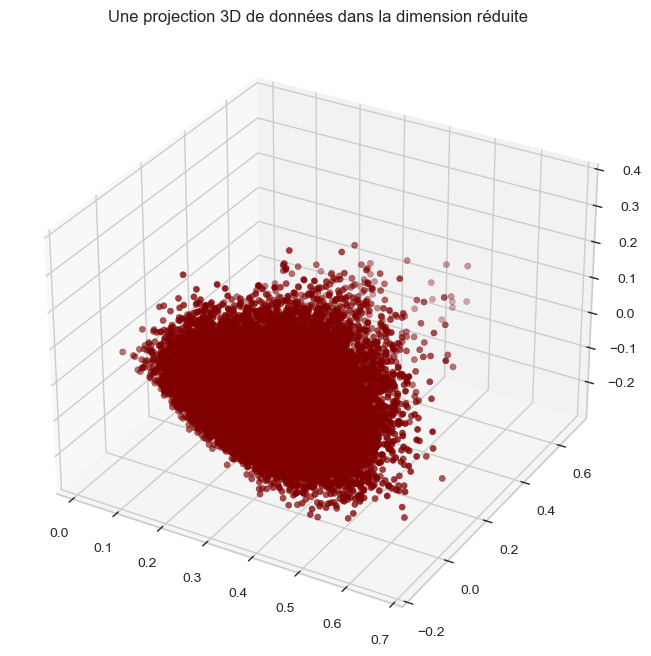

In [29]:
# Une projection 3D de données dans la dimension réduite
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]
#To plot
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z, c = "maroon", marker = "o" )
ax.set_title("Une projection 3D de données dans la dimension réduite")
# ax.view_init(10,azim=36O)
plt.show()


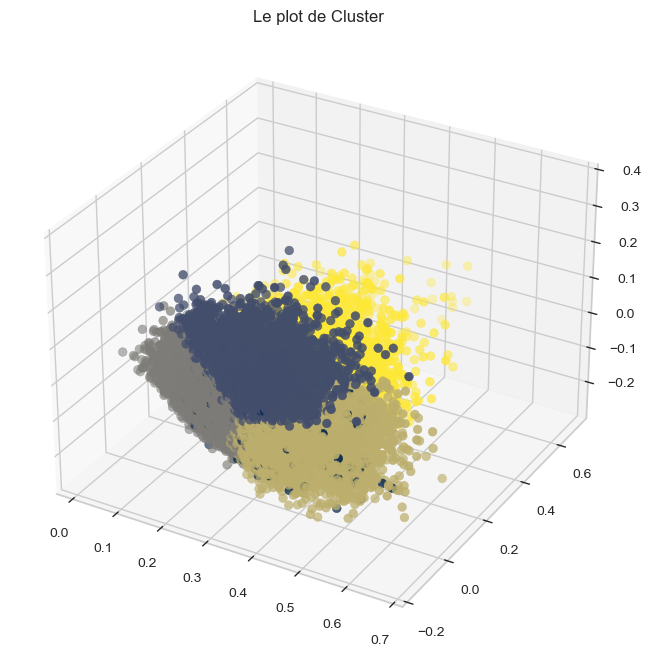

In [30]:
PCA_ds["Clusters"] = yhat
#Plotting the clusters
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d', label = "bla")
ax.scatter(x, y, z, s = 40, c = PCA_ds["Clusters"], marker = 'o', cmap = 'cividis')
ax.set_title("Le plot de Cluster")
plt.show()